## MONK 1

1. class: 0, 1
2. a1: 1, 2, 3
3. a2: 1, 2, 3
4. a3: 1, 2
5. a4: 1, 2, 3
6. a5: 1, 2, 3, 4
7. a6: 1, 2
8. Id: (A unique symbol for each instance)

### Data and Model Creation

In [0]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from keras.optimizers import SGD
from keras.models import Sequential
#from keras import regularizers
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

link1_training = 'https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-1.train'
link1_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-1.test'
train1 = pd.read_csv(link1_training, header=None, delim_whitespace=True, dtype=str)
test1 = pd.read_csv(link1_test, header=None, delim_whitespace=True, dtype=str)

Using TensorFlow backend.


In [0]:
# Splitting dataset into X (attributes - id) and y (target)
X1 = train1[train1.columns[1:-1]]
X1 = pd.get_dummies(X1)
y1 = train1[0]

X1_eval = test1[test1.columns[1:-1]]
X1_eval = pd.get_dummies(X1_eval)
y1_eval = test1[0]

In [0]:
def create_model(batch_size=8, units=7, lr=0.01, momentum=0.9, nesterov=False, decay=1e-6):
  model = Sequential()
  model.add(Dense(units, input_dim=17, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  opt = SGD(lr=lr, momentum=momentum, clipnorm=1, decay=decay, nesterov=nesterov)
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
  # model.compile(optimizer='rmsprop', loss='mse')

  return model

# Grid Params
param_list = {
              'batch_size': [8],#4, 8, 16, 32],
              'lr': [0.6],#0.01, 0.025, 0.05],
              'momentum': [0.9],#[0.875, 0.9, 0.925],
              'decay': [1e-6],#[0, 1e-6, 1e-3],
              'nesterov': [True] 
             }

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

n_epochs = 500
# batch_size = 16

### Grid

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

start = time.time()

classifier = KerasClassifier(build_fn=create_model, verbose=1, epochs=n_epochs)
grid = GridSearchCV(estimator=classifier, param_grid=param_list, verbose=1, n_jobs=1, cv=10)
grid_result = grid.fit(train_X1, train_y1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print()
print('----------')
end = time.time()
print('Fit time: ' + str(end - start))

Fitting 10 folds for each of 1 candidates, totalling 10 fits








[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Epoch 1/500





89/89 [==============================] - 1s 14ms/step - loss: 0.2501 - acc: 0.5506
Epoch 2/500
89/89 [==============================] - 0s 356us/step - loss: 0.1997 - acc: 0.6966
Epoch 3/500
89/89 [==============================] - 0s 417us/step - loss: 0.2009 - acc: 0.7191
Epoch 4/500
89/89 [==============================] - 0s 396us/step - loss: 0.1437 - acc: 0.8427
Epoch 5/500
89/89 [==============================] - 0s 343us/step - loss: 0.1147 - acc: 0.8652
Epoch 6/500
89/89 [==============================] - 0s 389us/step - loss: 0.1014 - acc: 0.8427
Epoch 7/500
89/89 [==============================] - 0s 362us/step - loss: 0.0863 - acc: 0.8764
Epoch 8/500
89/89 [==============================] - 0s 347us/step - loss: 0.0827 - acc: 0.8539
Epoch 9/500
89/89 [==============================] - 0s 355us/step - loss: 0.0622 - acc: 0.9326
Epoch 10/500
89/89 [==============================] - 0s 389us/step - loss: 0.0416 - acc: 0.9663
Epoch 11/500
89/89 [==============

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.0min finished


99/99 [==============================] - 0s 4ms/step - loss: 0.2498 - acc: 0.5556
Epoch 2/500
99/99 [==============================] - 0s 368us/step - loss: 0.2030 - acc: 0.6768
Epoch 3/500
99/99 [==============================] - 0s 367us/step - loss: 0.1436 - acc: 0.8182
Epoch 4/500
99/99 [==============================] - 0s 358us/step - loss: 0.1470 - acc: 0.7879
Epoch 5/500
99/99 [==============================] - 0s 364us/step - loss: 0.1073 - acc: 0.8788
Epoch 6/500
99/99 [==============================] - 0s 335us/step - loss: 0.0841 - acc: 0.9192
Epoch 7/500
99/99 [==============================] - 0s 362us/step - loss: 0.0658 - acc: 0.9293
Epoch 8/500
99/99 [==============================] - 0s 440us/step - loss: 0.0525 - acc: 0.9495
Epoch 9/500
99/99 [==============================] - 0s 378us/step - loss: 0.0313 - acc: 0.9596
Epoch 10/500
99/99 [==============================] - 0s 354us/step - loss: 0.0130 - acc: 1.0000
Epoch 11/500
99/99 [==============================] -

In [0]:
grid_result.cv_results_['params']

[{'batch_size': 8,
  'decay': 1e-06,
  'lr': 0.6,
  'momentum': 0.9,
  'nesterov': True}]

### Best Model

In [0]:
# Best model
#monk1_epochs = 1000
#monk1 = create_model(batch_size=8, lr=0.7, momentum=0.9, nesterov=False, decay=1e-6)
#monk1.fit(X1, y1, epochs=monk1_epochs, verbose=1, validation_split=0.1)

# Best Model 2
#monk1_epochs = 1000
#monk1 = create_model(batch_size=8, lr=0.4, momentum=0.7, nesterov=True)
#monk1.fit(X1, y1, epochs=monk1_epochs, verbose=1, validation_split=0.1)


monk1_epochs = 1000
monk1 = create_model(batch_size=8, units=7, lr=0.5, momentum=0.9, nesterov=False, decay=1e-7)
monk1.fit(X1, y1, epochs=monk1_epochs, verbose=1, validation_split=0.1)

print()
print('Train: %.3f, Validation: %.3f' % (monk1.history.history['acc'][monk1_epochs-1], monk1.history.history['val_acc'][monk1_epochs-1]))
scores = monk1.evaluate(X1_eval, y1_eval, verbose=1)
scores

Train on 111 samples, validate on 13 samples
Epoch 1/1000
111/111 [==============================] - 1s 7ms/step - loss: 0.2458 - acc: 0.5495 - val_loss: 0.3909 - val_acc: 0.0000e+00
Epoch 2/1000
111/111 [==============================] - 0s 72us/step - loss: 0.1912 - acc: 0.7568 - val_loss: 0.3628 - val_acc: 0.1538
Epoch 3/1000
111/111 [==============================] - 0s 67us/step - loss: 0.1520 - acc: 0.7748 - val_loss: 0.4119 - val_acc: 0.2308
Epoch 4/1000
111/111 [==============================] - 0s 63us/step - loss: 0.1288 - acc: 0.8378 - val_loss: 0.5659 - val_acc: 0.2308
Epoch 5/1000
111/111 [==============================] - 0s 69us/step - loss: 0.1254 - acc: 0.8378 - val_loss: 0.4757 - val_acc: 0.2308
Epoch 6/1000
111/111 [==============================] - 0s 71us/step - loss: 0.1126 - acc: 0.8378 - val_loss: 0.5693 - val_acc: 0.2308
Epoch 7/1000
111/111 [==============================] - 0s 67us/step - loss: 0.1098 - acc: 0.8468 - val_loss: 0.5124 - val_acc: 0.2308
Epoch 8

[0.0021118992036916863, 1.0]

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
scores = monk1.evaluate(X1_eval, y1_eval, verbose=1)
scores

432/432 [==============================] - 0s 42us/step


[0.0021118992036916863, 1.0]

Train: 0.00002, Val: 0.03818


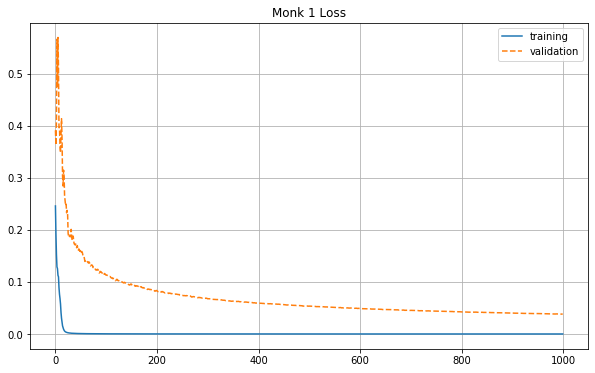

In [0]:
print('Train: %.5f, Val: %.5f' % (monk1.history.history['loss'][monk1_epochs-1], monk1.history.history['val_loss'][monk1_epochs-1]))
# plot loss during training
plt.figure(figsize=(10,6))#da rivedere
plt.title('Monk 1 Loss')
plt.plot(monk1.history.history['loss'], label='training')
plt.plot(monk1.history.history['val_loss'], label='validation', ls='--')
plt.legend()
# plt.xlim(0,n_epochs)
# plt.ylim(0,10)
plt.grid()
plt.show()

Train: 1.000, Val: 1.000


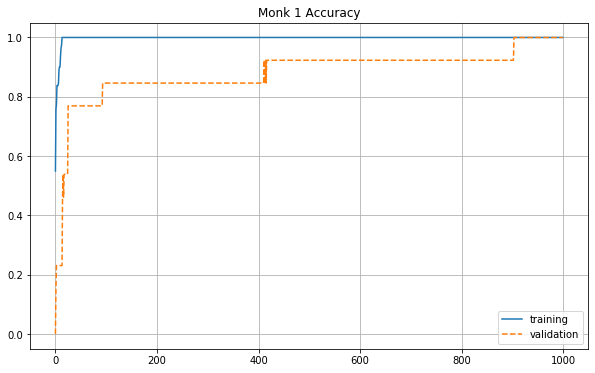

In [0]:
print('Train: %.3f, Val: %.3f' % (monk1.history.history['acc'][monk1_epochs-1], monk1.history.history['val_acc'][monk1_epochs-1]))
# plot loss during training
plt.figure(figsize=(10,6))#da rivedere
plt.title('Monk 1 Accuracy')
plt.plot(monk1.history.history['acc'], label='training')
plt.plot(monk1.history.history['val_acc'], label='validation', ls='--')
plt.legend()
# plt.xlim(0,n_epochs)
# plt.ylim(0,10)
plt.grid()
plt.show()

## MONK 2


### Data and Model Creation

In [0]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

link2_training = 'https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-2.train'
link2_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-2.test'
train2 = pd.read_csv(link2_training, header=None, delim_whitespace=True, dtype=str)
test2 = pd.read_csv(link2_test, header=None, delim_whitespace=True, dtype=str)

In [0]:
# Splitting dataset into X (attributes - id) and y (target)
X2 = train2[train2.columns[1:-1]]
X2 = pd.get_dummies(X2)
y2 = train2[0]

X2_eval = test2[test2.columns[1:-1]]
X2_eval = pd.get_dummies(X2_eval)
y2_eval = test2[0]

In [0]:
def create_model(batch_size=32, lr=0.01, momentum=0.9, nesterov=True):
  model = Sequential()
  model.add(Dense(7, input_dim=17, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  opt = SGD(lr=lr, momentum=momentum, clipnorm=1, decay=1e-6, nesterov=nesterov)
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
  # model.compile(optimizer='rmsprop', loss='mse')

  return model

# Grid Params
param_list = {
              'batch_size': [4, 8, 16, 32],
              'lr': [0.01, 0.025, 0.05],
              'momentum': [0.875, 0.9, 0.925],
              'nesterov': [True] 
             }

train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

n_epochs = 200
# batch_size = 16

### Best Model

In [0]:
monk2_epochs = 1000
monk2 = create_model(batch_size=8, lr=0.035, momentum=0.9, nesterov=False)
monk2.fit(X2, y2, epochs=monk2_epochs, verbose=1, validation_split=0.1)

print()
print('Train: %.3f, Validation: %.3f' % (monk2.history.history['acc'][monk2_epochs-1], monk2.history.history['val_acc'][monk2_epochs-1]))
scores = monk2.evaluate(X2_eval, y2_eval, verbose=1)
scores

Train on 152 samples, validate on 17 samples
Epoch 1/1000
152/152 [==============================] - 1s 4ms/step - loss: 0.2606 - acc: 0.4868 - val_loss: 0.2847 - val_acc: 0.3529
Epoch 2/1000
152/152 [==============================] - 0s 124us/step - loss: 0.2516 - acc: 0.5329 - val_loss: 0.2621 - val_acc: 0.5294
Epoch 3/1000
152/152 [==============================] - 0s 116us/step - loss: 0.2429 - acc: 0.6053 - val_loss: 0.2416 - val_acc: 0.5882
Epoch 4/1000
152/152 [==============================] - 0s 115us/step - loss: 0.2380 - acc: 0.6382 - val_loss: 0.2278 - val_acc: 0.6471
Epoch 5/1000
152/152 [==============================] - 0s 113us/step - loss: 0.2366 - acc: 0.6184 - val_loss: 0.2208 - val_acc: 0.6471
Epoch 6/1000
152/152 [==============================] - 0s 117us/step - loss: 0.2355 - acc: 0.6053 - val_loss: 0.2194 - val_acc: 0.6471
Epoch 7/1000
152/152 [==============================] - 0s 153us/step - loss: 0.2341 - acc: 0.6053 - val_loss: 0.2196 - val_acc: 0.6471
Epoch

[0.00037385276206165416, 1.0]

Train: 0.000, Val: 0.000


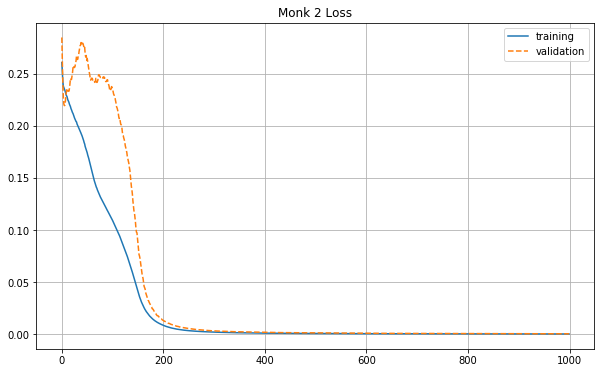

In [0]:
print('Train: %.3f, Val: %.3f' % (monk2.history.history['loss'][monk2_epochs-1], monk2.history.history['val_loss'][monk2_epochs-1]))
# plot loss during training
plt.figure(figsize=(10,6))#da rivedere
plt.title('Monk 2 Loss')
plt.plot(monk2.history.history['loss'], label='training')
plt.plot(monk2.history.history['val_loss'], label='validation', ls='--')
plt.legend()
# plt.xlim(0,n_epochs)
# plt.ylim(0,10)
plt.grid()
plt.show()

Train: 1.000, Val: 1.000


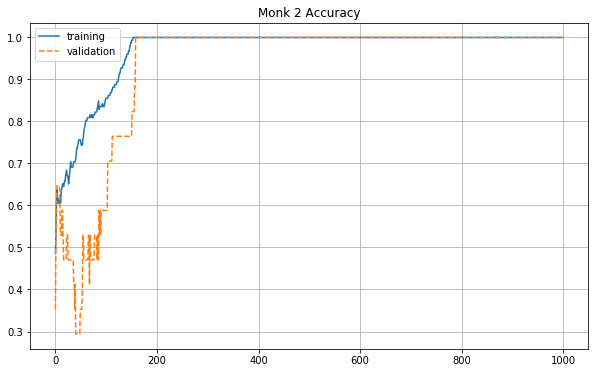

In [0]:
print('Train: %.3f, Val: %.3f' % (monk2.history.history['acc'][monk2_epochs-1], monk2.history.history['val_acc'][monk2_epochs-1]))
# plot loss during training
plt.figure(figsize=(10,6))#da rivedere
plt.title('Monk 2 Accuracy')
plt.plot(monk2.history.history['acc'], label='training')
plt.plot(monk2.history.history['val_acc'], label='validation', ls='--')
plt.legend()
# plt.xlim(0,n_epochs)
# plt.ylim(0,10)
plt.grid()
plt.show()

## MONK 3


### Data and Model Creation

In [0]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

link3_training = 'https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-3.train'
link3_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/monks-problems/monks-3.test'
train3 = pd.read_csv(link3_training, header=None, delim_whitespace=True, dtype=str)
test3 = pd.read_csv(link3_test, header=None, delim_whitespace=True, dtype=str)

In [0]:
# Splitting dataset into X (attributes - id) and y (target)
X3 = train3[train3.columns[1:-1]]
X3 = pd.get_dummies(X3)
y3 = train3[0]

X3_eval = test3[test3.columns[1:-1]]
X3_eval = pd.get_dummies(X3_eval)
y3_eval = test3[0]

In [0]:
def create_model(batch_size=32, lr=0.01, momentum=0.9, nesterov=True):
  model = Sequential()
  model.add(Dense(7, input_dim=17, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  opt = SGD(lr=lr, momentum=momentum, clipnorm=1, decay=1e-3, nesterov=nesterov)
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
  # model.compile(optimizer='rmsprop', loss='mse')

  return model

# Grid Params
param_list = {
              'batch_size': [4, 8, 16, 32],
              'lr': [0.01, 0.025, 0.05],
              'momentum': [0.875, 0.9, 0.925],
              'nesterov': [True] 
             }

train_X3, test_X3, train_y3, test_y3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

n_epochs = 200
# batch_size = 16

In [0]:
X3_valid = X3_eval[:200]
y3_valid = y3_eval[:200]

X3_minitest = X3_eval[201:]
y3_minitest = y3_eval[201:]

### Best Model

In [0]:
monk3_epochs = 2000
monk3 = create_model(batch_size=8, lr=0.0075, momentum=0.7, nesterov=False)
monk3.fit(X3, y3, epochs=monk3_epochs, verbose=1, validation_split=0.25)
#monk3.fit(X3, y3, epochs=monk3_epochs, verbose=1, validation_data=[X3_valid, y3_valid])

print()
print('Train: %.3f, Validation: %.3f' % (monk3.history.history['acc'][monk3_epochs-1], monk3.history.history['val_acc'][monk3_epochs-1]))
scores = monk3.evaluate(X3_eval, y3_eval, verbose=1)
#scores = monk3.evaluate(X3_minitest, y3_minitest, verbose=1)
scores








Train on 91 samples, validate on 31 samples
Epoch 1/2000





91/91 [==============================] - 9s 103ms/step - loss: 0.2922 - acc: 0.4396 - val_loss: 0.3010 - val_acc: 0.4516
Epoch 2/2000
91/91 [==============================] - 0s 239us/step - loss: 0.2912 - acc: 0.4396 - val_loss: 0.2995 - val_acc: 0.4516
Epoch 3/2000
91/91 [==============================] - 0s 218us/step - loss: 0.2889 - acc: 0.4505 - val_loss: 0.2982 - val_acc: 0.4516
Epoch 4/2000
91/91 [==============================] - 0s 214us/step - loss: 0.2872 - acc: 0.4505 - val_loss: 0.2967 - val_acc: 0.4516
Epoch 5/2000
91/91 [==============================] - 0s 250us/step - loss: 0.2851 - acc: 0.4505 - val_loss: 0.2953 - val_acc: 0.4516
Epoch 6/2000
91/91 [==============================] - 0s 202us/step - loss: 0.2832 - acc: 0.4615 - val_loss: 0.2939 - val_acc: 0.4516
Epoch 7/2000
91/91 [==============================] - 0s 201us/step - loss: 0.2814 - acc: 0.4835 - val_loss: 0.2926 - val_acc: 0.4516
Epoch 

[0.05252632567728007, 0.9652777777777778]

Train: 0.048, Val: 0.084


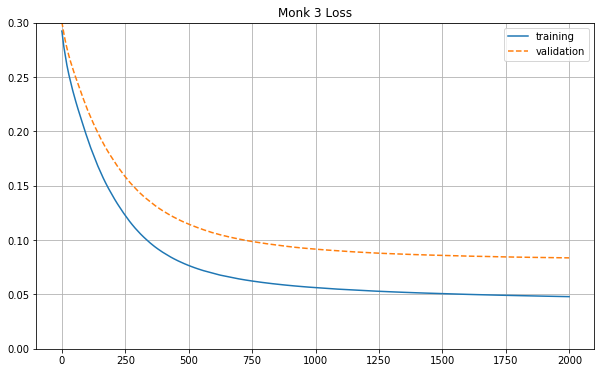

In [0]:
print('Train: %.3f, Val: %.3f' % (monk3.history.history['loss'][monk3_epochs-1], monk3.history.history['val_loss'][monk3_epochs-1]))
# plot loss during training
plt.figure(figsize=(10,6))#da rivedere
plt.title('Monk 3 Loss')
plt.plot(monk3.history.history['loss'], label='training')
plt.plot(monk3.history.history['val_loss'], label='validation', ls='--')
plt.legend()
# plt.xlim(0,n_epochs)
plt.ylim(0,0.3)
plt.grid()
plt.show()

Train: 0.934, Val: 0.935
Test: 0.968


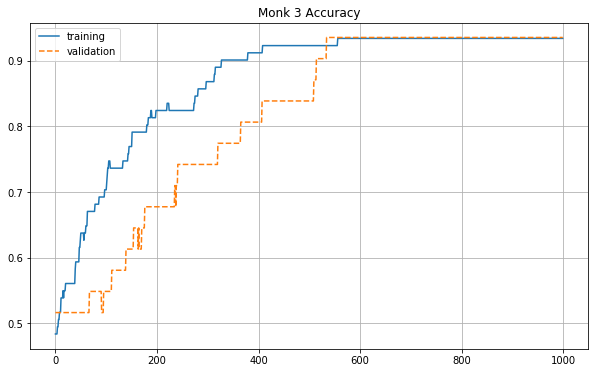

In [0]:
print('Train: %.3f, Val: %.3f' % (monk3.history.history['acc'][monk3_epochs-1], monk3.history.history['val_acc'][monk3_epochs-1]))
print('Test: %.3f' % (scores[1]))
# plot loss during training
plt.figure(figsize=(10,6))#da rivedere
plt.title('Monk 3 Accuracy')
plt.plot(monk3.history.history['acc'], label='training')
plt.plot(monk3.history.history['val_acc'], label='validation', ls='--')
plt.legend()
# plt.xlim(0,n_epochs)
# plt.ylim(0,10)
plt.grid()
plt.show()